## Collecting Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Exploratory Data Analysis 

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

In [11]:
sns.set() #setting seaborn default for plots

#### Bar Chart for Categorical features 

##### Pclass, Sex, SibSp (# of siblings or spouse), #Parch (# of parent or children), Embarked, Cabin 

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()    
    df = pd.DataFrame([survived])
    df.plot(kind='bar', stacked=False, figsize=(10,5))

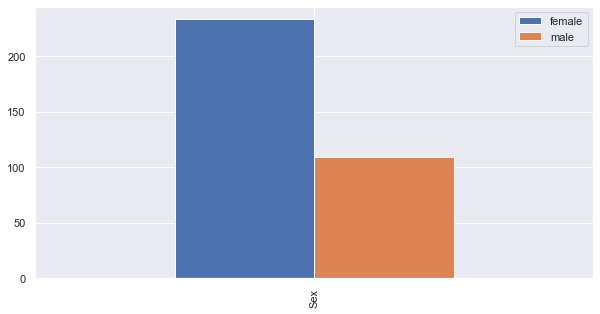

In [13]:
bar_chart('Sex')

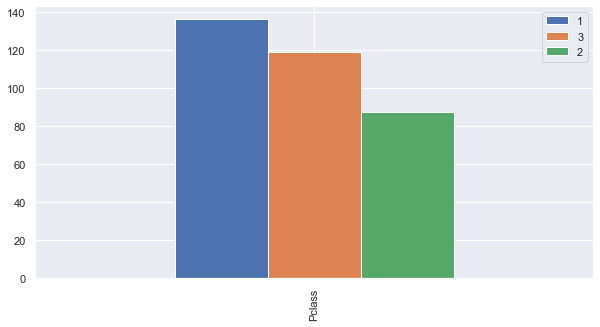

In [14]:
bar_chart('Pclass')

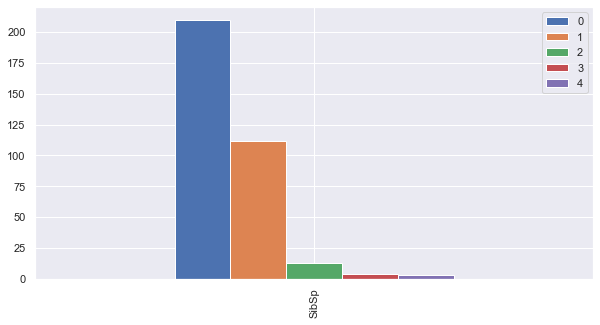

In [15]:
bar_chart('SibSp')

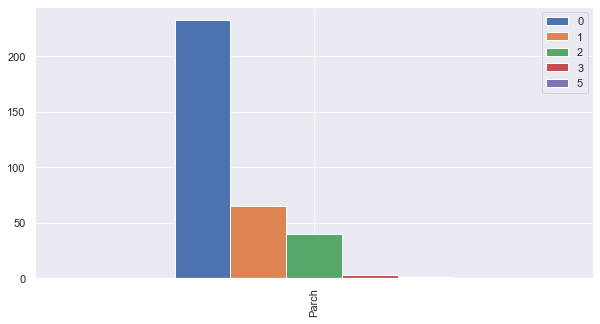

In [16]:
bar_chart('Parch')

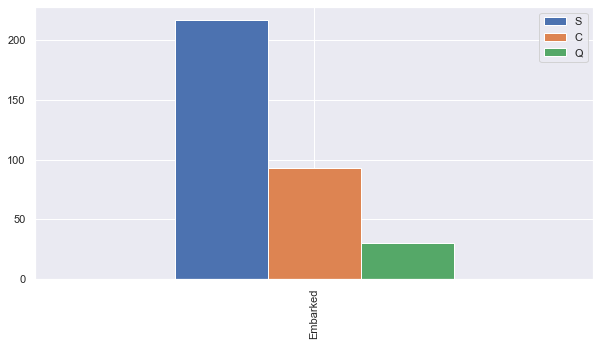

In [17]:
bar_chart('Embarked')

## Feature Engineering 

######  ~ is the process of using domain knowledge of the data to create features that make Machine Learning Algorithms work

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Name 

In [19]:
train_test_data = [train,test] #combining train test data

for dataset in train_test_data:
    dataset['title'] = dataset['Name'].str.extract('([A-Za-z]+)\.',expand= False)

In [20]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Jonkheer      1
Capt          1
Lady          1
Don           1
Sir           1
Ms            1
Mme           1
Name: title, dtype: int64

In [21]:
test['title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: title, dtype: int64

In [22]:
titles = set(train['title'].unique())
titles.update(test['title'].unique())
titles

{'Capt',
 'Col',
 'Countess',
 'Don',
 'Dona',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir'}

In [23]:
title_mapping = {}

for t in titles:
    kk=-1
    if t == 'Mr':
        kk=0
    elif t=='Miss':
        kk=1
    elif t == 'Mrs':
        kk=2
    else:
        kk=3
    title_mapping[t] = kk
    
for dataset in train_test_data:
    dataset['title'] = dataset['title'].map(title_mapping)

In [24]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [25]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


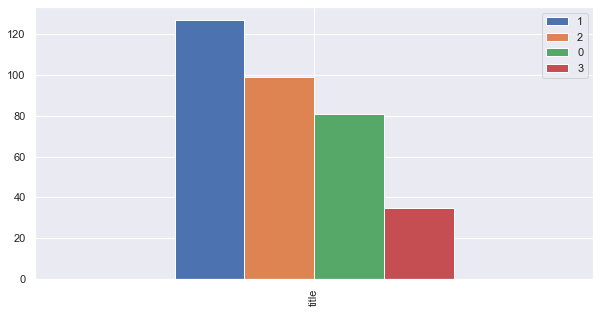

In [26]:
bar_chart('title')

In [27]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [28]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### Sex 

In [30]:

sex_mapping = {
    'male': 0, 'female': 1
}

In [31]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


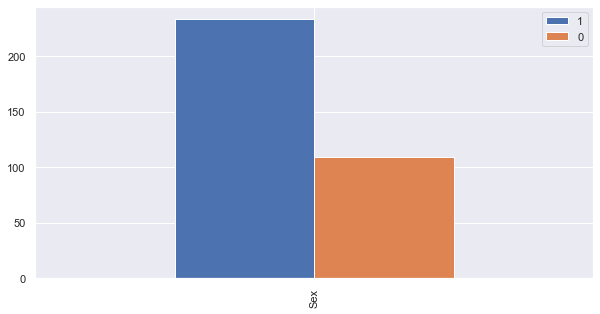

In [33]:
bar_chart('Sex')

#### Age (some is missing) 

In [34]:
#fill missing age with median age for each title
train['Age'].fillna(train.groupby('title')['Age'].transform("median"), inplace=True)
test['Age'].fillna(test.groupby('title')['Age'].transform("median"), inplace=True)

In [35]:
def facet_plot(feature,min_value ,max_value):
    facet = sns.FacetGrid(train, hue='Survived',aspect=4)
    facet.map(sns.kdeplot,feature, shade=True)
    facet.set(xlim=(min_value,max_value))
    facet.add_legend()

    plt.show()


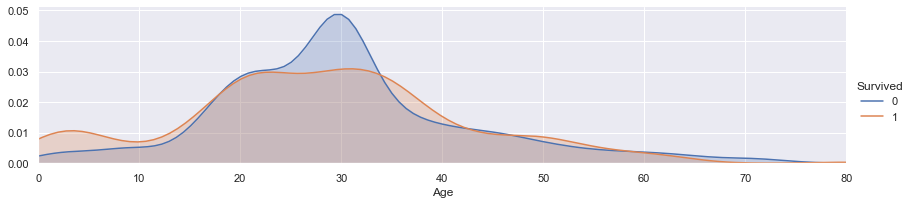

In [36]:
facet_plot('Age', 0,train['Age'].max())

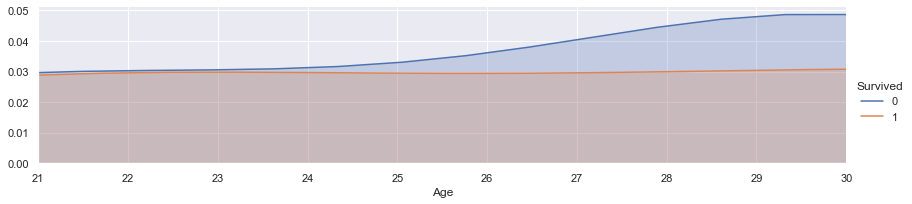

In [37]:
facet_plot('Age', 21,30)

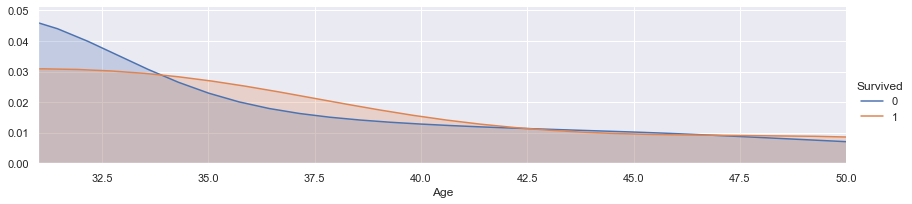

In [38]:
facet_plot('Age', 31, 50)

####  we will apply binning after sometime (TODO)

#### Embarked 

In [39]:
#fillig missing values

pClass1 = train[train['Pclass']==1]['Embarked'].value_counts()
pClass2 = train[train['Pclass']==2]['Embarked'].value_counts()
pClass3 = train[train['Pclass']==3]['Embarked'].value_counts()

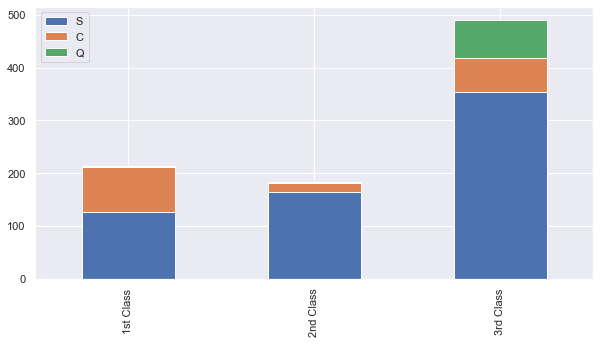

In [40]:
df = pd.DataFrame([pClass1,pClass2,pClass3])
df.index = ['1st Class','2nd Class', '3rd Class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [41]:
for dataset in train_test_data:
    dataset.Embarked.fillna('S',inplace=True)

In [42]:
embarked_mapping ={
    'S' : 0, 'C': 1, 'Q' : 2
}

for dataset in train_test_data:
    dataset['Embarked'] =  dataset['Embarked'].map(embarked_mapping)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     891 non-null    int64  
 11  title        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [44]:
train['Fare'].fillna(train.groupby("Pclass")['Fare'].transform("median"), inplace = True)
test['Fare'].fillna(test.groupby("Pclass")['Fare'].transform("median"), inplace = True)

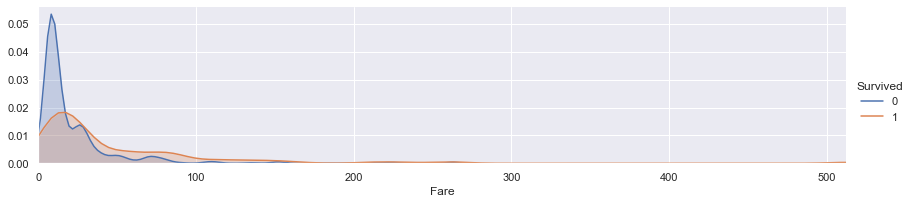

In [45]:
facet_plot('Fare',0,train['Fare'].max())

###### cheap ticket died more 

####  Cabin

######  we will analyze later (TODO)

In [46]:
#for now dropping
for dataset in train_test_data:
    dataset.drop('Cabin',axis=1,inplace=True)


In [47]:
features_drop = ['SibSp','Parch','Ticket']

train.drop(features_drop,axis=1,inplace=True)
test.drop(features_drop,axis=1,inplace=True)

train.drop('PassengerId',axis=1,inplace=True)

In [48]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title
0,0,3,0,22.0,7.2500,0,0
1,1,1,1,38.0,71.2833,1,2
2,1,3,1,26.0,7.9250,0,1
3,1,1,1,35.0,53.1000,0,2
4,0,3,0,35.0,8.0500,0,0


In [49]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title
0,892,3,0,34.5,7.8292,2,0
1,893,3,1,47.0,7.0000,0,2
2,894,2,0,62.0,9.6875,2,0
3,895,3,0,27.0,8.6625,0,0
4,896,3,1,22.0,12.2875,0,2


In [50]:
train_data = train.drop('Survived',axis=1)
target = train['Survived']

train.shape, target.shape

((891, 7), (891,))

# Modeling 

In [51]:
#importing classifier modules

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   title     891 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


### Cross Validation (K-fold) 

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state= 0)


### kNN 

In [54]:
knn_clf = KNeighborsClassifier(n_neighbors=13)
scoring = 'accuracy'

score = cross_val_score(knn_clf, train_data,target,cv = k_fold, n_jobs= 1, scoring= scoring)
print(score)

[0.7        0.79775281 0.71910112 0.66292135 0.68539326 0.74157303
 0.75280899 0.73033708 0.69662921 0.74157303]


In [55]:
#knn score
np.mean(score)*100

72.28089887640449

### Decision Tree 

In [56]:
dc_clf = DecisionTreeClassifier()
score = cross_val_score(dc_clf,train_data, target, cv= k_fold, n_jobs=1 , scoring=scoring)
print(score)

[0.77777778 0.80898876 0.80898876 0.78651685 0.80898876 0.78651685
 0.7752809  0.71910112 0.78651685 0.80898876]


In [57]:
np.mean(score)*100

78.67665418227216

### Random Forest 

In [58]:
rf_clf = RandomForestClassifier(n_estimators=60, random_state=1, class_weight='balanced')
score = cross_val_score(rf_clf,train_data, target, cv= k_fold, n_jobs=1 , scoring=scoring)
print(score)

[0.81111111 0.85393258 0.7752809  0.79775281 0.83146067 0.80898876
 0.80898876 0.82022472 0.79775281 0.80898876]


In [59]:
np.mean(score)*100

81.14481897627964

### SVM 

In [60]:
svm_clf = SVC()
score = cross_val_score(svm_clf,train_data, target, cv= k_fold, n_jobs=1 , scoring=scoring)
print(score)

[0.65555556 0.76404494 0.68539326 0.57303371 0.76404494 0.70786517
 0.66292135 0.68539326 0.60674157 0.62921348]


In [61]:
np.mean(score)*100

67.34207240948813

## Testing  

In [62]:
#random forest has highest accuracy
clf = RandomForestClassifier(n_estimators=60, random_state=1, class_weight='balanced')
clf.fit(train_data,target)

test_data = test.drop('PassengerId',axis=1).copy()
prediction = clf.predict(test_data)

In [63]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived" : prediction
})

submission.to_csv("submission.csv", index = False)

In [64]:
submission = pd.read_csv("submission.csv")
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


## Testing v2 

In [65]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=1,solver='liblinear')
ssvm = SVC(kernel='linear',class_weight='balanced',degree=2)
dt = DecisionTreeClassifier(criterion='gini',random_state=1)

evc = VotingClassifier( estimators = [('lr',lr), ('ssvm',ssvm), ('dt',dt)], voting = 'hard')

In [66]:
evc.fit(train_data,target)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=1,
                                                 solver='liblinear')),
                             ('ssvm',
                              SVC(class_weight='balanced', degree=2,
                                  kernel='linear')),
                             ('dt', DecisionTreeClassifier(random_state=1))])

In [67]:
prediction2 = evc.predict(test_data)

In [68]:
submission = pd.DataFrame({
    "PassengerId":test["PassengerId"],
    "Survived" : prediction2
})

submission.to_csv("submission_ensemble.csv", index = False)